# PyTorch Computer Vision

Reference book --> https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer Vision Libraries in PyTorch

* [`torchvision`](https://pytorch.org/vision/stable/index.html) - base domain library for pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for our model
* `torch.utils.Dataset` - base class for all datasets in PyTorch
* `torch.utils.DataLoader` - Creates a python iterable over a dataset.

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # This function has been deprecated.

# Import matplotlib for visualization
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## 1. Getting a dataset
We're using the [Fashion MNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST) dataset from torchvision.datasets. It contains grayscale images of 10 different kinds of clothing. We have to classify the images into those 10 categories.

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download the data
    train=True,  # do we want the training data
    download=True,  # do you want to download the data
    transform=ToTensor(), # What transformation do you want to apply to the data
    target_transform=None # Do you want to transform the target/labels
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# Let's see what our training sample looks like
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Input and Output shapes of computer vision model.

Let's see the image shape and labels.

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
print(f'Image Shape: {image.shape} --> [color_channels, height, width]\nImage Label: {class_names[label]}')

Image Shape: torch.Size([1, 28, 28]) --> [color_channels, height, width]
Image Label: Ankle boot


The shape of the image tensor is [1, 28, 28] or more specifically:

`[color_channels=1, height=28, width=28]`

Having `color_channels=1` means the image is grayscale.

The order of our current tensor is often referred to as CHW (Color Channels, Height, Width).

There's debate on whether images should be represented as CHW (color channels first) or HWC (color channels last).

PyTorch generally accepts NCHW (channels first) as the default for many operators.

However, PyTorch also explains that NHWC (channels last) performs better and is considered best practice.

For now, since our dataset and models are relatively small, this won't make too much of a difference.

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.2 Visualizing our data

Image Shape: torch.Size([1, 28, 28])


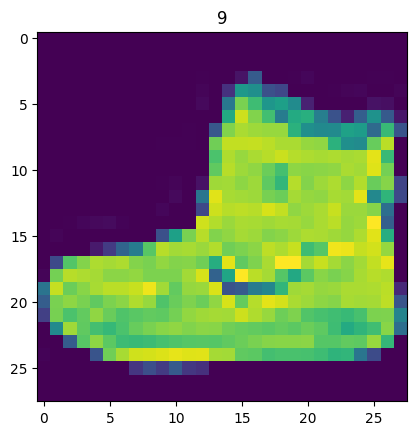

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f'Image Shape: {image.shape}')
plt.imshow(image.squeeze()) # Img shape is [1, 28, 28]
plt.title(label);

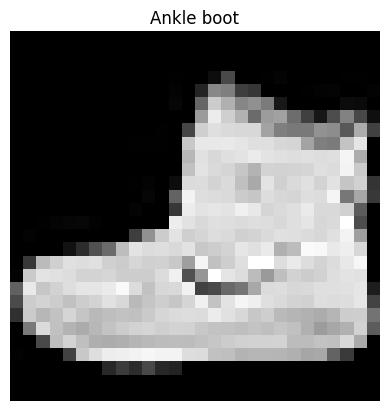

In [9]:
plt.imshow(image.squeeze(), cmap='gray')  # Using grayscale colormap
plt.title(class_names[label])
plt.axis(False);  # We don't want our axis to be numbered.

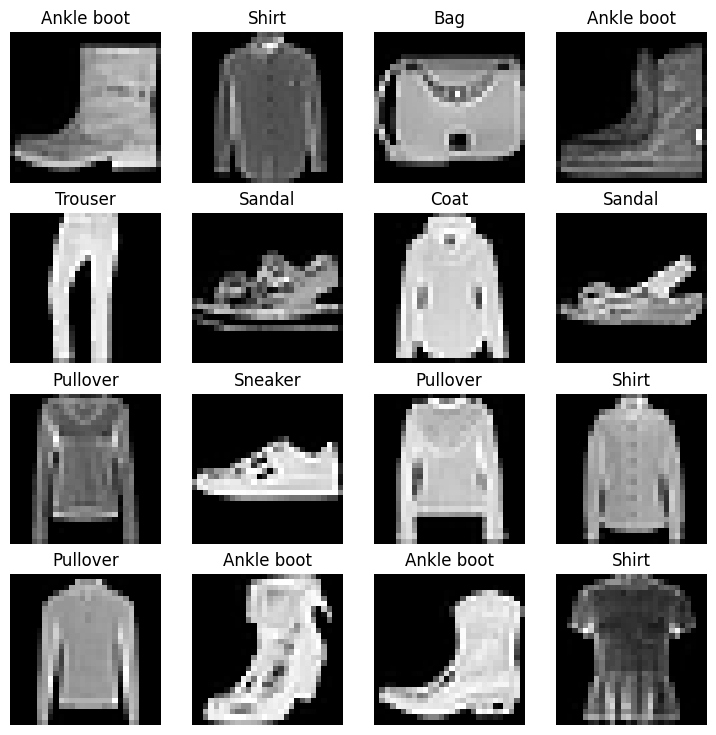

In [10]:
# Plot more images
torch.manual_seed(42)
torch.cuda.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item() # Generating random index between 1 and 60000.
  image, label = train_data[random_idx] # Setting image, label to data at random index
  fig.add_subplot(rows, cols, i)  # Creating subplots in the figure.
  plt.imshow(image.squeeze(), cmap='gray')  # Plot the image
  plt.title(class_names[label])
  plt.axis(False);

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data in in the form of PyTorch Datasets.

DataLoader turns our dataset into a python iterable.

More specifically, we want to turn our data into batches (or mini-batches). We do this because -
* It is more computationally efficient as in your computing hardware may not be able to look at (store in memory) 60000 images at one hit. So we break it down to 32 images at a time (32 is a common batch size).
* It gives our Neural Network more chances to update it's gradients per epoch.

Mini batch size is a value you can set (a hyperparameter), so, you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

For more info: [Andrew Ng](https://www.youtube.com/watch?v=4qJaSmvhxi8)

![DataLoader](https://github.com/suryansh-sinha/Learning-PyTorch/blob/main/Daniel%20Bourke/images/03_PyTorch_Computer_Vision/DataLoader_Annotated.png?raw=true)

What the dataloader will do is, split the entire dataset into 60000/32 = 1875 batches. Each batch will have 32 images.

DataLoader documentation --> https://pytorch.org/docs/stable/data.html

In [12]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d0ec2ad2380>,
 <torch.utils.data.dataloader.DataLoader at 0x7d0ec2ad36d0>)

In [13]:
# Let's checkout what we've created.
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...')
print(f'Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d0ec2ad2380>, <torch.utils.data.dataloader.DataLoader object at 0x7d0ec2ad36d0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [14]:
# Checking out what's inside the training dataloader.
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


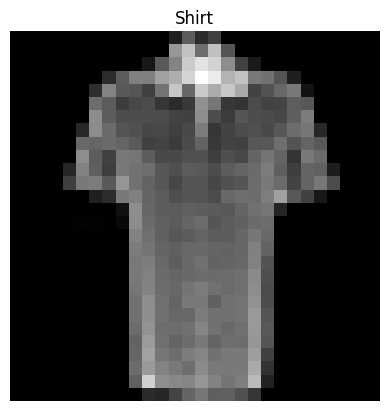

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Creating Model 0 (A Baseline Model)

A baseline model is one of the simplest models you can imagine. When starting to build models for a ML experiment, it's best practice to start with a baseline model.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Our baseline will consist of two `nn.Linear()` layers.

Because we're working with image data, we're going to use a different layer to start things off.

`nn.Flatten()` compresses the dimensions of a tensor into a single vector.

In [16]:
# Create a flatten layer.
flatten_model = nn.Flatten()

# Get a single sample
X = train_features_batch[0] # Getting a single image from batch of 32.

# Flatten the sample
output = flatten_model(X) # Flattens the model, has 28*28 = 784 values in it.

print(f'Shape before flattening: {X.shape}')
print(f'Shape after flattening: {output.shape}')

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [17]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.Linear(hidden_units, output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setup model with input parameters
model0 = FashionMNISTModelV0(
    input_shape = 28*28, # This is equal to 28*28
    hidden_units = 10,  # Number of nodes in hidden layer
    output_shape = len(class_names)   # Number of nodes in output layer (10 because we have 10 classes)
).to('cpu')

model0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28])  # Creating a dummy image
model0(dummy_x) # Gives us logits for each class.

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [22]:
str(next(model0.parameters()).device)

'cpu'

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - Since we're working with multiclass data, the loss function we will use is `nn.CrossEntropyLoss()`.
* Optimizer - We're going to use the standard SGD optimizer here.
* Evaluation - We're going to evaluate this using confusion matrix and accuracy.

In [23]:
# Helper function for accuracy
# def accuracy_fn(y_true, y_pred):
#   correct = torch.eq(y_true, y_pred).sum().item() # Calculate the total correct predictions.
#   acc = (correct/len(y_pred)) * 100
#   return acc

In [24]:
# Using the function from learn pytorch repo -
from pathlib import Path
import requests

if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [25]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model0.parameters(),
                            lr=0.1)

### 3.2 Create a function to time our experiments.

Two of the main things you'll want to check for our experiments is:
1. Model's performance (loss and evaluation metrics).
2. How fast does it run.

In [26]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):

  """Prints difference between start and end time"""
  total_time = end - start
  print(f'Train time on {device}: {total_time:3f} seconds')
  return total_time

In [27]:
start_time = timer()
# Code
end_time = timer()
print_train_time(start = start_time,
                 end = end_time,
                 device='cpu')

Train time on cpu: 0.000045 seconds


4.5308999688131735e-05

### 3.3 Creating a training and testing loop to train model on batches of data.
1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print all statistics
5. Time it all (How long it takes to run)

In [28]:
# Import tqdm for progress bar
from tqdm.auto import tqdm  # Checks what environment we're running in and gives us the progress bar accordingly.

# Set the seed and start the timer.
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)): # We wrap our iterator in tqdm to get progress bar.
  print(f'Epoch: {epoch}\n------')
  ### Training
  # We start with 0 and accumulate loss for the entire batch.
  train_loss = 0  # Divide this by batch size at end of training batch to get avg loss for batch.
  # Loop through training batches:
  for batch, (X, y) in enumerate(train_dataloader): # X is image, y is label. Enumerate adds indexing to each object of iterable.
    model0.train()

    # 1. Forward Pass
    y_logits = model0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_logits, y)
    train_loss += loss  # Accumulate train loss for each image in batch.

    # 3. Gradients to zero
    optimizer.zero_grad()

    # 4. Backpropagate on loss
    loss.backward()

    # 5. Update parameters
    optimizer.step()

    if batch%400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')

  # Divide total train loss by length of train_dataloader to get average train loss.
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_logits = model0(X_test)

      # 2. Calculate test loss
      test_loss += loss_fn(test_logits, y_test)

      # 3. Calculate accuracy
      # Not using softmax here because it just scales the logits such that the sum of them all is 1.
      # The maximum logit still remains the same, hence we can directly find the index of the max logit.
      test_acc += accuracy_fn(y_test, test_logits.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f'\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}')

# Calculate the training time
train_time_end_on_cpu = timer()

total_train_time_model0 = print_train_time(start = train_time_start_on_cpu,
                                           end = train_time_end_on_cpu,
                                           device = str(next(model0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.5904 | Test Loss: 0.5102, Test Acc: 82.04
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4743 | Test Loss: 0.5268, Test Acc: 81.68
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4537 | Test Loss: 0.5126, Test Acc: 83.00
Train time on cpu: 36.504873 seconds


## 4. Make predictions and get model0 results

Since we're going to be building a few models, it's a good idea to write some code to evaluate them all in similar ways.

Namely, let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [29]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn,
               device: torch.device = None):
  """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
  """

  loss, acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):

      X, y = X.to(device), y.to(device)

      # Make predictions
      y_logits = model(X)

      # Get loss
      loss += loss_fn(y_logits, y)

      # Get accuracy
      acc += acc_fn(y, y_logits.argmax(dim=1))

    # Scale loss, accuracy to find average for batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # Only works when model was created using class.
          "model_loss": loss.item(),
          "model_acc": acc}

# Model 0 results
model0_results = eval_model(model0,
                            test_dataloader,
                            loss_fn,
                            accuracy_fn)

model0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

## 5. Setup device agnostic code
Now let's setup some device-agnostic code for our models and data to run on GPU if it's available.


In [30]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

In [31]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(), # flatten inputs into single vector
      nn.Linear(in_features=input_shape, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_shape),
      nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [32]:
model1 = FashionMNISTModelV1(784, 10, len(class_names)).to(device)
next(model1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics.


In [33]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and testing/eval loops

In [34]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """ Performs a training with model trying to learn on data_loader. """
  train_loss, train_acc = 0, 0

  model.to(device)

  ### Training
  model.train()

  # Loop through training batches:
  for batch, (X, y) in enumerate(data_loader): # X is image, y is label. Enumerate adds indexing to each object of iterable.

    # Move data to target device.
    X, y = X.to(device), y.to(device)

    # 1. Forward Pass
    y_logits = model(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_logits, y)
    train_loss += loss  # Accumulate train loss for each image in batch.
    train_acc += accuracy_fn(y, y_logits.argmax(dim=1))

    # 3. Gradients to zero
    optimizer.zero_grad()

    # 4. Backpropagate on loss
    loss.backward()

    # 5. Update parameters
    optimizer.step()

    if batch%400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')

  # Divide total train loss by length of train_dataloader to get average train loss.
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%')

In [35]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  ### Testing
  test_loss, test_acc = 0, 0

  model.to(device)
  # Model in eval mode
  model.eval()

  # Turn on inference mode context manager.
  with torch.inference_mode():
    for X, y in data_loader:

      # Moving tensors to correct device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_logits = model(X)

      # 2. Calculate test loss
      test_loss += loss_fn(test_logits, y)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y, test_logits.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(data_loader)
    # Calculate the test accuracy average per batch
    test_acc /= len(data_loader)
    print(f'Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%')

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setting timer
train_time_start_on_gpu = timer()

# Setting epochs
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'\nEpoch: {epoch}\n------')
  train_step(model1,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)

  test_step(model1,
             test_dataloader,
             loss_fn,
             accuracy_fn,
             device)

train_time_end_on_gpu = timer()

total_train_time_model1 = print_train_time(start = train_time_start_on_gpu,
                                           end = train_time_end_on_gpu,
                                           device = str(next(model1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.69330 | Train Acc: 75.74%
Test Loss: 0.55147 | Test Acc: 80.59%

Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.49588 | Train Acc: 82.30%
Test Loss: 0.57094 | Test Acc: 79.80%

Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.46783 | Train Acc: 83.29%
Test Loss: 0.53934 | Test Acc: 81.67%
Train time on cuda:0: 30.643007 seconds


**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU rather than GPU

This is because -
- The overhead for copying data/model to GPU from CPU outweighs the compute benefits offered by the GPU
- The CPU is better at compute than the GPU.

For more info on this --> https://horace.io/brrr_intro.html

In [37]:
model1_results = eval_model(model1,
                            test_dataloader,
                            loss_fn,
                            accuracy_fn,
                            device)
model1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.5387409925460815,
 'model_acc': 81.69928115015975}

## 7. Model 2 - Building a Convolutional Neural Network (CNN)

CNNs are also known as ConvNets. They are great if you want to work with image data.

In [38]:
# Create convnet replicating the TinyVGG network.
class FashionMNISTModelv2(nn.Module):

  """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
  """

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7,
                  out_features = len(class_names))
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [39]:
model2 = FashionMNISTModelv2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)
model2

FashionMNISTModelv2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

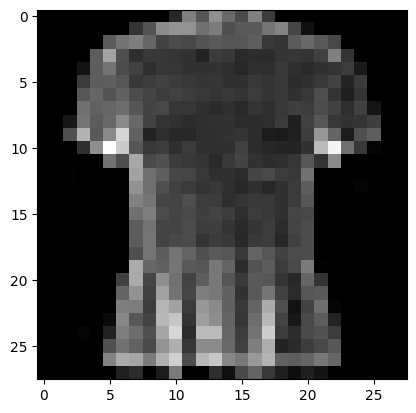

In [40]:
plt.imshow(image.squeeze(0), cmap='gray')

In [41]:
image.shape

torch.Size([1, 28, 28])

In [42]:
# Pass image through model to check if its working or not
model2(image.unsqueeze(dim=0).to(device))

tensor([[ 0.0293,  0.0396, -0.0419, -0.0314,  0.0093, -0.0007, -0.0065, -0.0178,
          0.0371, -0.0024]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [43]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test Image: \n{test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test Image: 
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [44]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [45]:
# Checking the dimensions of our output
conv_layer(test_image).shape

torch.Size([10, 62, 62])

Let's try changing the hyperparameters of the conv layer and see how it affects the shape of the output.


In [46]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image).shape

torch.Size([10, 30, 30])

In [47]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [48]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


### 7.2 Stepping through `nn.MaxPool2d()`

In [49]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


The kernel_size of the nn.MaxPool2d() layer will affect the size of the output shape.

In our case, the shape halves from a 62x62 image to 31x31 image.

Let's see this on a smaller tensor.

In [50]:
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))  # Single image of 2x2 dimension.
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # Size of kernel is also 2x2.

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Essentially, every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space.

In other words, take a lot of numbers (raw data) and learn patterns in those numbers, patterns that are predictive whilst also being smaller in size than the original values.

From an artificial intelligence perspective, you could consider the whole goal of a neural network to compress information.

### 7.3 Setup loss function and optimizer for `model2`

In [51]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(),
                            lr=0.1)

In [52]:
model2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060],
                        [ 0.0520,  0.2693,  0.0364]]],
              
              
                      [[[-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927],
                        [-0.1457,  0.1924,  0.0596]]],
              
              
                      [[[ 0.1693, -0.2032, -0.3300],
                        [-0.1288, -0.2557,  0.2735],
                        [ 0.0960,  0.1381,  0.1054]]],
              
              
                      [[[-0.0058,  0.2609, -0.2368],
                        [ 0.0210, -0.2275,  0.1028],
                        [-0.1148,  0.1021, -0.0694]]],
              
              
                      [[[ 0.2765, -0.1976, -0.1988],
                        [-0.1988,  0.2998,  0.1111],
                        [ 0.3208, -0.2751, -0.3306]]],
              
              
      

### 7.4 Training and Testing our CNN Model


In [53]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model2 = timer()

# Train and Test Model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}')
  train_step(model=model2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model2 = timer()

total_train_time_model2 = print_train_time(start=train_time_start_model2,
                                           end=train_time_end_model2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.69123 | Train Acc: 74.76%
Test Loss: 0.40069 | Test Acc: 85.41%
Epoch: 1
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.36455 | Train Acc: 86.78%
Test Loss: 0.39711 | Test Acc: 85.50%
Epoch: 2
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.32794 | Train Acc: 88.05%
Test Loss: 0.34862 | Test Acc: 87.68%
Train time on cuda: 37.830273 seconds


In [54]:
# Get model2 results
model2_results = eval_model(model2, test_dataloader, loss_fn, accuracy_fn, device)
model2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.3479112684726715,
 'model_acc': 87.70966453674122}

## 8. Comparing model results and training time.


In [55]:
import pandas as pd
compare_results = pd.DataFrame([model0_results,
                                model1_results,
                                model2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.512530,83.007188
1,FashionMNISTModelV1,0.538741,81.699281
2,FashionMNISTModelv2,0.347911,87.709665


In [56]:
compare_results["training_time"] = [total_train_time_model0,
                                    total_train_time_model1,
                                    total_train_time_model2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.512530,83.007188,36.504873
1,FashionMNISTModelV1,0.538741,81.699281,30.643007
2,FashionMNISTModelv2,0.347911,87.709665,37.830273


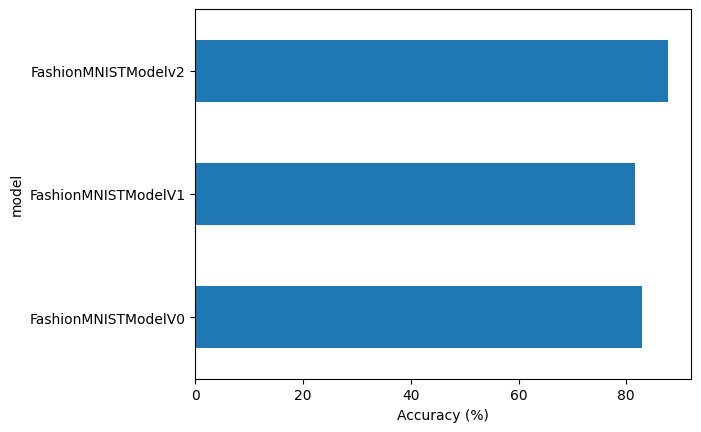

In [57]:
# Visualize our model comparisions
compare_results.set_index("model_name")["model_acc"].plot(kind='barh')
plt.xlabel('Accuracy (%)')
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [60]:
def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device = None):

  pred_probs = []

  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample by adding batch dimension and then moving to device.
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU because we'll use matplotlib too.
      pred_probs.append(pred_prob.cpu())


  # Stack the pred probs to turn list to tensor.
  return torch.stack(pred_probs)

In [61]:
image, label = test_data[0][:10]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [62]:
import random
random.seed(42)
test_samples = []
test_labels = []

# 9 samples
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

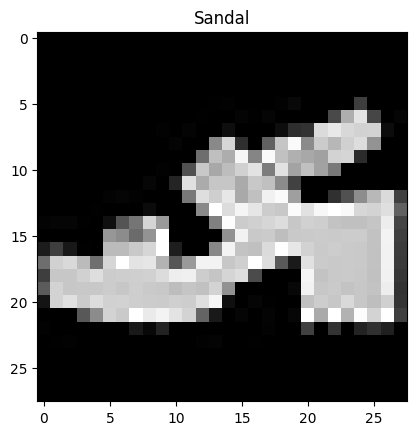

In [67]:
plt.imshow(test_samples[0].squeeze(0), cmap='gray')
plt.title(class_names[test_labels[0]])

In [70]:
# Make predictions
pred_probs = make_predictions(model2, test_samples, device)
pred_probs[:2], pred_probs.shape

(tensor([[2.0476e-07, 2.3890e-07, 3.5208e-07, 2.4023e-08, 1.3710e-07, 9.9480e-01,
          1.4648e-06, 1.0546e-04, 2.7973e-05, 5.0646e-03],
         [6.9996e-02, 8.0550e-01, 4.3734e-03, 7.2590e-02, 4.0722e-02, 2.0634e-05,
          5.8328e-03, 2.4966e-04, 5.6888e-04, 1.4202e-04]]),
 torch.Size([9, 10]))

In [71]:
# Converting prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

In [72]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

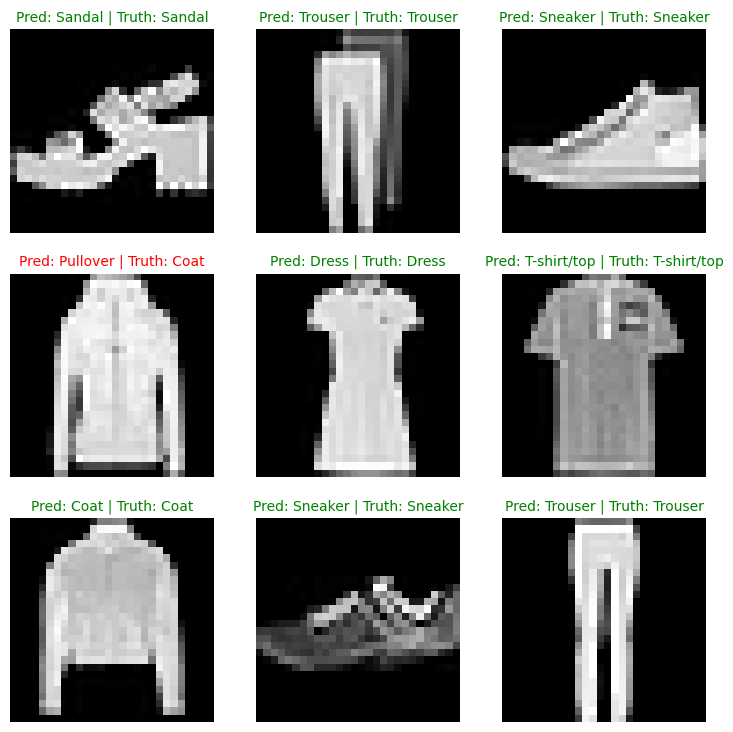

In [73]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);